In [1]:
# change to True if you use Google Colaboratory:
GoogleColaboratory = False

In [2]:
import os, sys, importlib

if GoogleColaboratory :

    !pip3 install healpy
    
    user = "mahlers77"
    repo = "KSETA2023"

    if os.path.isdir(repo):
        !rm -rf {repo}

    !git clone https://github.com/{user}/{repo}.git

    if not repo in sys.path:
        sys.path.insert(1, repo)

else :
    repo = "."

#for path in sys.path : 
#  print(path)

In [3]:
%matplotlib inline
import numpy as np
import healpy as H
from pylab import *
import matplotlib.pyplot as plt
from scipy.special import erf

In [4]:
# resolution of output maps
nside = 32
npix = H.nside2npix(nside)

map = np.zeros(npix,dtype=int)

RUNS = 1000
Ntot = 100

KS = []

Nbins = 1000

cosx = np.arange(0,Nbins)/(1.0*Nbins)*2.0-1.0
sumyiso = 1./2.*(1.0-cosx)

for run in range(0,RUNS) :
    
    theta = []
    phi = []
    nx = []
    ny = []
    nz = []

    for i in range(0,Ntot) :
        phitemp = np.random.rand()*2*np.pi
        x = np.random.rand()

        # dipole anisotropy :
        ani = 0.9
        #costhetatemp = (1.-np.sqrt(1.0+2.*ani+ani**2-4.*ani*x))/ani

        #isotropic :
        costhetatemp = 2.0*x-1.0

        thetatemp = np.arccos(costhetatemp)

        nxtemp = np.cos(phitemp)*np.sin(thetatemp)
        nytemp = np.sin(phitemp)*np.sin(thetatemp)
        nztemp = np.cos(thetatemp)

        phi.append(phitemp)
        theta.append(thetatemp)
        nx.append(nxtemp)
        ny.append(nytemp)
        nz.append(nztemp)

    cosphi = []
    for i in range(0,Ntot) :
        for j in range(0,i) :
            cosphitemp = nx[i]*nx[j] + ny[i]*ny[j] + nz[i]*nz[j]
            cosphi.append(cosphitemp)

    totpairs = len(cosphi)

    y = np.zeros(Nbins,dtype=int)

    for i in range(0,totpairs) :
        bin = int((cosphi[i]+1.)/2.*Nbins)
        y[bin] += 1

    sumy = np.zeros(Nbins,dtype=int)

    sumy[Nbins-1] = y[0]
    for i in range(1,Nbins) :
        sumy[Nbins-i-1] = sumy[Nbins-i] + y[i]

    sumy = sumy/(1.*totpairs)

    KS.append(max(np.abs(sumy-sumyiso)))
       

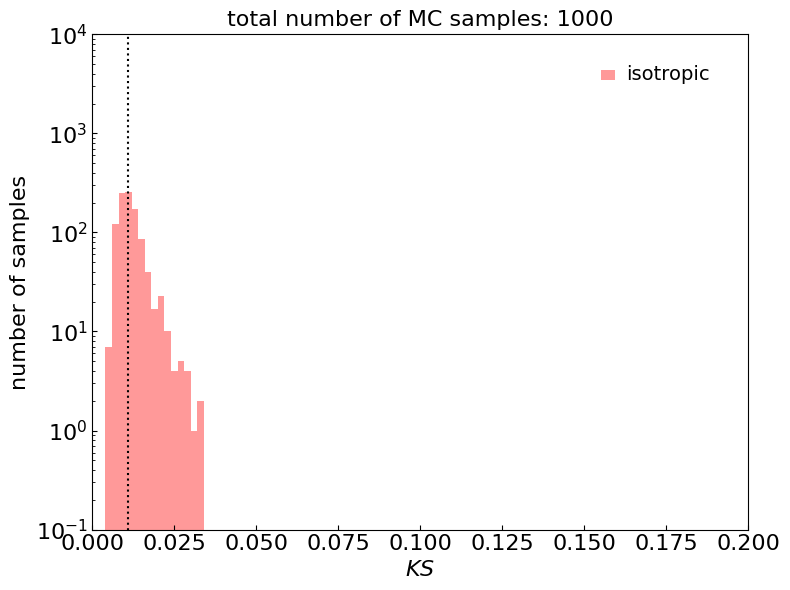

In [5]:
NKS = 100
delta = 0.002

# plot histograms of simulation

fig = figure(dpi=100,tight_layout=True,figsize=(8, 6))
ax = fig.add_subplot(1,1,1)

xlim([0,0.2])
ylim([0.1,1e4])

title(r'total number of MC samples: ' + str(len(KS)),fontsize=16)
xlabel(r'$KS$',fontsize=16)
ylabel(r'number of samples',fontsize=16)
ax.tick_params(axis='both',which='both',direction='in')

for tick in ax.xaxis.get_major_ticks() :
    tick.label.set_fontsize(16) 

for tick in ax.yaxis.get_major_ticks() :
    tick.label.set_fontsize(16)  
    
plt.hist(KS,bins=np.arange(0,NKS*delta,delta),log=True,alpha=0.4,color="red",label=r'isotropic')

med = np.median(KS)
plt.plot(np.array([med,med]),np.array([0.01,1e5]),color="black",linestyle="dotted")

leg = plt.legend(bbox_to_anchor=(0.95, 0.95), loc=1, borderaxespad=0.,fancybox=False,\
                 framealpha=0.0,frameon=True,numpoints=1, scatterpoints = 1,handlelength=1)
for t in leg.get_texts() :
    t.set_fontsize(14)

plt.show()